In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
rc = {"xtick.labelsize": 12, "ytick.labelsize": 12, "axes.labelsize": 15, 
      "axes.titlesize": 15, "legend.fontsize": 12}
sns.set_context("notebook", rc=rc)

In [3]:
data1 = pd.read_csv('train.csv')
data1.head()

,id,price,description,neighborhood_overview,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,2000,126,Maroubra/Little Bay Ocean Views/City and Airpo...,Close to beaches and cafes at La Perouse and L...,2016-04-15,NaN,within a few hours,100%,75%,f,...,4,5.00,5.00,5.00,4.75,5.00,4.75,5.00,f,0.40
1,2001,248,Stay in one of Sydney’s most sought out neighb...,"Surrounded by jaw dropping waterfront views, P...",2021-06-16,"Sydney, Australia",within an hour,100%,94%,f,...,14,4.07,4.36,3.64,4.57,4.57,4.86,3.93,f,4.67
2,2002,164,Conveniently located between Sydney CBD and th...,There's Wulaba Park with kids playground and a...,2017-10-05,"Sydney, Australia",within an hour,100%,98%,t,...,229,4.94,4.96,4.96,4.86,4.98,4.86,4.90,t,4.86
3,2003,475,"Recently renovated free standing home, walk to...","Close to coffee shops , restaurants , movie ci...",2016-09-26,"Queens Park, Australia",NaN,NaN,100%,f,...,2,5.00,5.00,4.50,5.00,5.00,5.00,5.00,t,0.06
4,2004,263,This stunning apartment is located in the hear...,Our neighbourhoods are quiet and friendly.<br ...,2019-01-04,NaN,within an hour,100%,97%,f,...,247,4.74,4.85,4.82,4.49,4.73,4.98,4.69,t,5.75


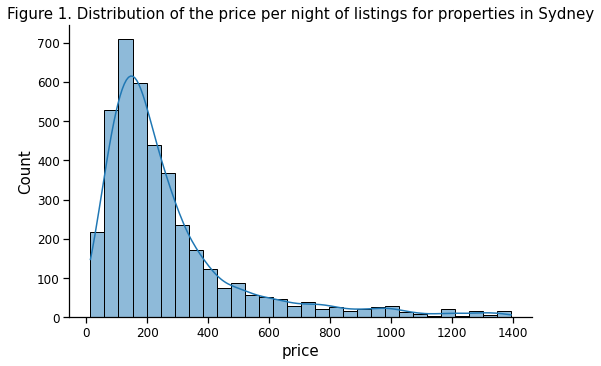

In [4]:
fig = sns.displot(x='price', data= data1 , kde=True, bins=30, aspect=1.5)
fig.set(title='Figure 1. Distribution of the price per night of listings for properties in Sydney');

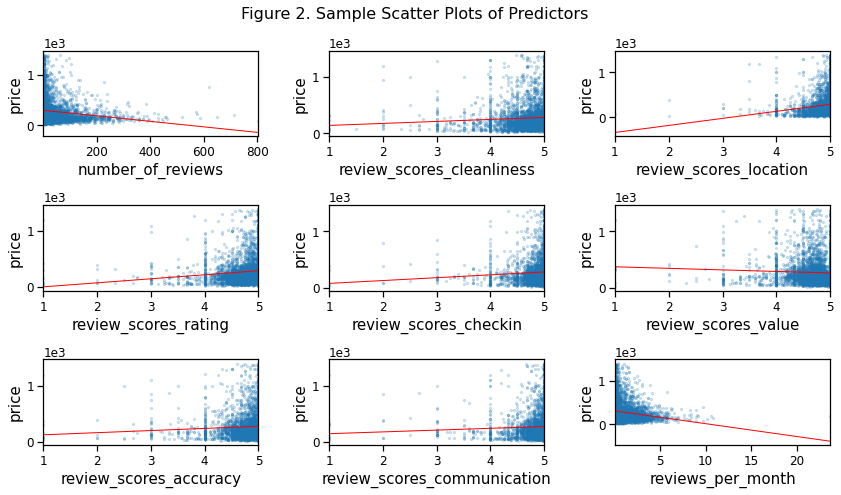

In [5]:
select_predictors = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location','review_scores_value','reviews_per_month']

fig, axs = plt.subplots(3, 3, figsize=(12, 7))
for i in range(len(select_predictors)):
    ax = sns.regplot(x=select_predictors[i], y='price', ax=axs[i%3][(i//3)%3], data=data1, ci=None, 
                scatter_kws={'s':5, 'alpha':0.2}, line_kws={'color':'red', 'linewidth':1})
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
fig.suptitle('Figure 2. Sample Scatter Plots of Predictors', fontsize=16)
plt.tight_layout()

### <font color = '#e64626'>2.1 Log transformation of the response</font>



In [6]:
data1['LogPrice'] = np.log(data1['price'])

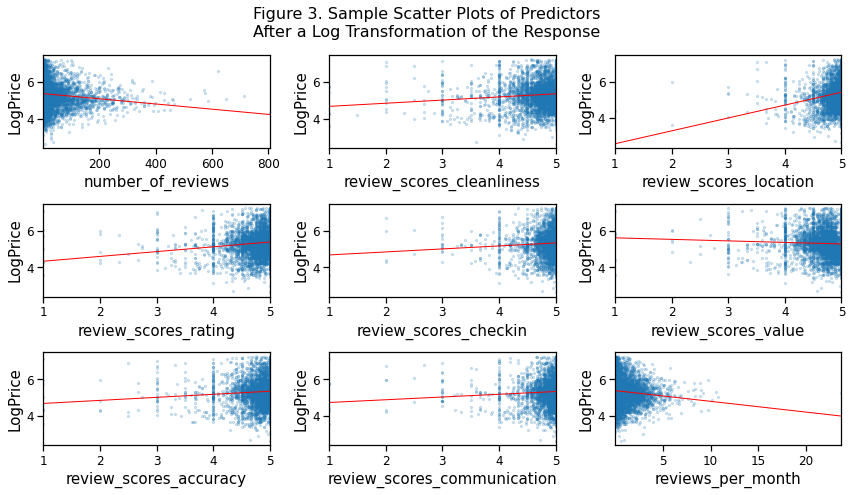

In [7]:
select_predictors = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                     'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location','review_scores_value','reviews_per_month']

fig, axs = plt.subplots(3, 3, figsize=(12, 7))
for i in range(len(select_predictors)):
    ax = sns.regplot(x=select_predictors[i], y='LogPrice', ax=axs[i%3][(i//3)%3], data=data1, ci=None, 
                scatter_kws={'s':5, 'alpha':0.2}, line_kws={'color':'red', 'linewidth':1})
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
fig.suptitle('Figure 3. Sample Scatter Plots of Predictors\nAfter a Log Transformation of the Response', fontsize=16)
plt.tight_layout()

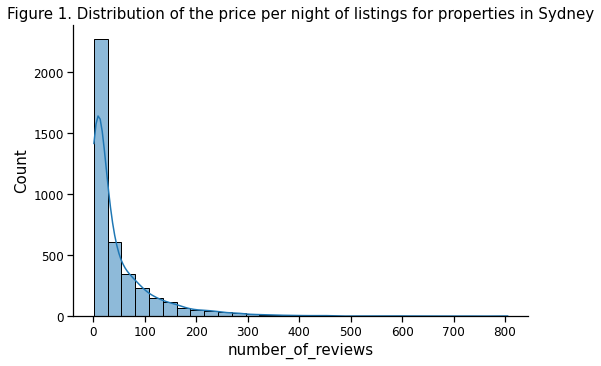

In [12]:
fig = sns.displot(x='number_of_reviews', data= data1 , kde=True, bins=30, aspect=1.5)
fig.set(title='Figure 1. Distribution of the price per night of listings for properties in Sydney');

